In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#training data (initially random)
num_samples = 1000
supermarkets = np.random.randint(0,4,num_samples) #supermarket choice(0 - 3)
temperatures = np.random.randint(200,300,num_samples) #temp (200-300)
salts = np.random.uniform(0.1,1.0,num_samples) #salt level (grams)
peppers = np.random.uniform(0.1, 1.0, num_samples)
times = np.random.randint(5,15, num_samples)

In [4]:
#convert the data to input format for the model
X = np.stack([supermarkets,temperatures,salts,peppers,times],axis=1)

In [19]:
# Lets define the friend's scoring function (the hidden ideal parameters)
def friend_score(supermarkets,temperatures,salts,peppers,times):
  #ideal parameters for 10/10 steak
  ideal_params = {
      'supermarkets' :2,
      'temperatures' :250,
      'salts' :0.5,
      'peppers' : 0.3,
      'times' : 8
  }
  #calculating score based on distance from ideal values
  score = 10 - (
      abs(supermarkets - ideal_params['supermarkets']) *1.5 +
      abs(temperatures - ideal_params['temperatures']) *0.02 +
      abs(salts - ideal_params['salts']) *15 +
      abs(peppers - ideal_params['peppers']) *10 +
      abs(times - ideal_params['times']) *1.2

  )

  return max(0, score) #Ensure score does'nt go below 0

In [20]:
friend_score(2,250,0.5,.3,8)

10.0

In [21]:
friend_score(4,200,1,3,8)

0

In [22]:
scores = []
#lopp over each set of parameters and calculate the score
for s, t, salt, peppers, time in zip(supermarkets, temperatures,salts,peppers,times):
  score = friend_score(s, t, salt, peppers, time) #calculate the score
  scores.append(score)  #Append the score to the list

#convert the list of scores to a numpy array
y = np.array(scores)


In [24]:
import seaborn as sns


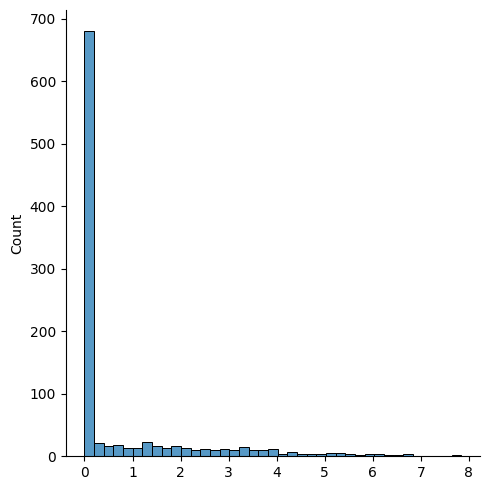

In [25]:
sns.displot(y)

Model_1

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(1)  # Output is the predicted score
])

In [32]:
#scale the data so model perform do best
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='mse')

In [31]:
model.fit(X_scaled, y, epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5404   
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0741 
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7707 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4705 
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6605
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3981 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7093 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1483 
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3357 
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6698 
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0155  
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0570 
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1214 
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0164 
Epoch 15/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [34]:
X_scaled

array([[0.33333333, 0.4040404 , 0.9080556 , 0.77029318, 0.44444444],
       [0.66666667, 0.57575758, 0.9716461 , 0.45569754, 0.77777778],
       [0.        , 0.61616162, 0.69969267, 0.49888944, 0.        ],
       ...,
       [1.        , 0.62626263, 0.10293825, 0.20349609, 0.55555556],
       [0.        , 0.70707071, 0.85801959, 0.76122306, 0.66666667],
       [1.        , 0.91919192, 0.7783892 , 0.89814224, 0.11111111]])

In [35]:
model.fit(X_scaled, y, epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1286 
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2664 
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2718 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0941 
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1061 
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1206 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0686 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0700 
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0993 
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1558  
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9826 
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1001 
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0420 
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0430 
Epoch 15/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo